# Earthquake Prediction in Nepal: Gorkha Earthquake Project

## Problem Statement
Nepal is prone to earthquakes, which can cause severe damage to buildings and infrastructure. Accurate prediction of earthquake damage can help in disaster preparedness and reduce the impact of future earthquakes.

This project focuses on the Gorkha earthquake in Nepal. It aims to analyze earthquake data and create a model to predict the level of building damage. The project is divided into three main tasks:

1. Task 1:-Prepare a complete data analysis report on the given data.

2. Task 2:-Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

3. Task3:-Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings


### Task 1: Data Analysis Report

- Prepare a detailed report on the provided earthquake data.
- Clean and preprocess the data.
- Explore the data to find patterns and significant features.
- Visualize the data to understand damage distribution and correlations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
#loading the data
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [4]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [7]:
train_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
[features for features in train_values.columns if train_values[features].isnull().sum()>0]

[]

In [9]:
train_values.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [10]:
#merge the label/target column with the features
train_values = pd.merge(train_values,train_labels,on='building_id')

In [11]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


# Exploratory Data Analysis

plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
sns.countplot(train_labels['damage_grade'])
plt.xlabel('Values')
plt.ylabel('counts')
plt.title('Damage grade')


C:\Users\Hp\AppData\Local\Temp\ipykernel_9572\4167539579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='damage_grade', data=train_labels, palette='viridis')  # Assuming train_labels is defined correctly


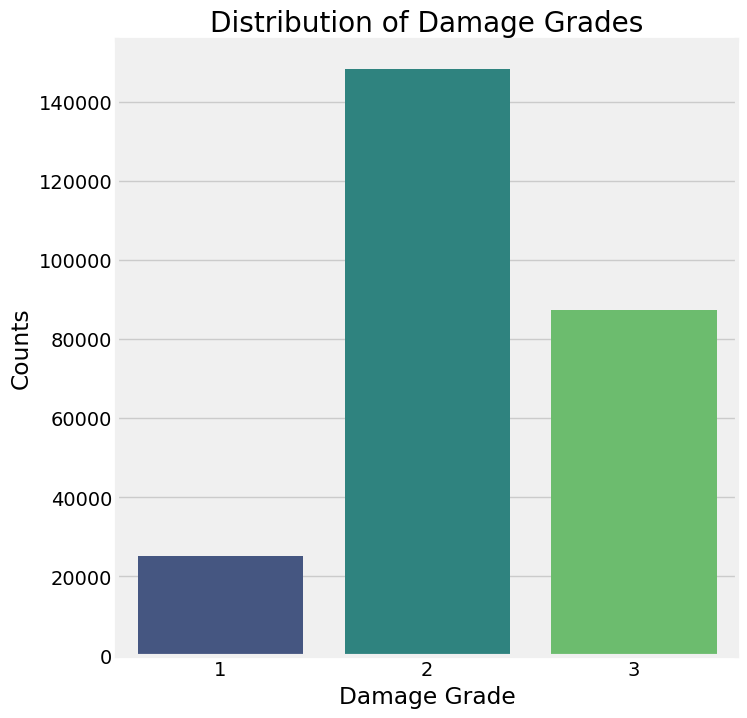

In [12]:
# Example to define train_labels DataFrame (Ensure you have your actual DataFrame loaded)
# train_labels = pd.DataFrame({'damage_grade': np.random.choice([1, 2, 3], size=1000)})

plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
# Corrected seaborn countplot call
sns.countplot(x='damage_grade', data=train_labels, palette='viridis')  # Assuming train_labels is defined correctly
plt.xlabel('Damage Grade')  # Proper labeling
plt.ylabel('Counts')
plt.title('Distribution of Damage Grades')

plt.show()


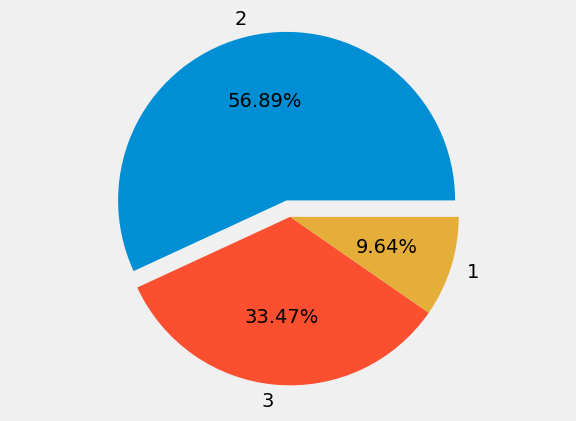

In [13]:
# Calculating percentage of each damage grade
percent = list(train_values['damage_grade'].value_counts() / len(train_values['damage_grade']) * 100)
labels = list(train_values['damage_grade'].value_counts().index)
explode = (0.1, 0, 0)  # Providing some separation for the first slice

# Creating the pie chart
fig, ax1 = plt.subplots()
ax1.pie(percent, explode=explode, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


####  Damage category 2 & 3 is higher than 1

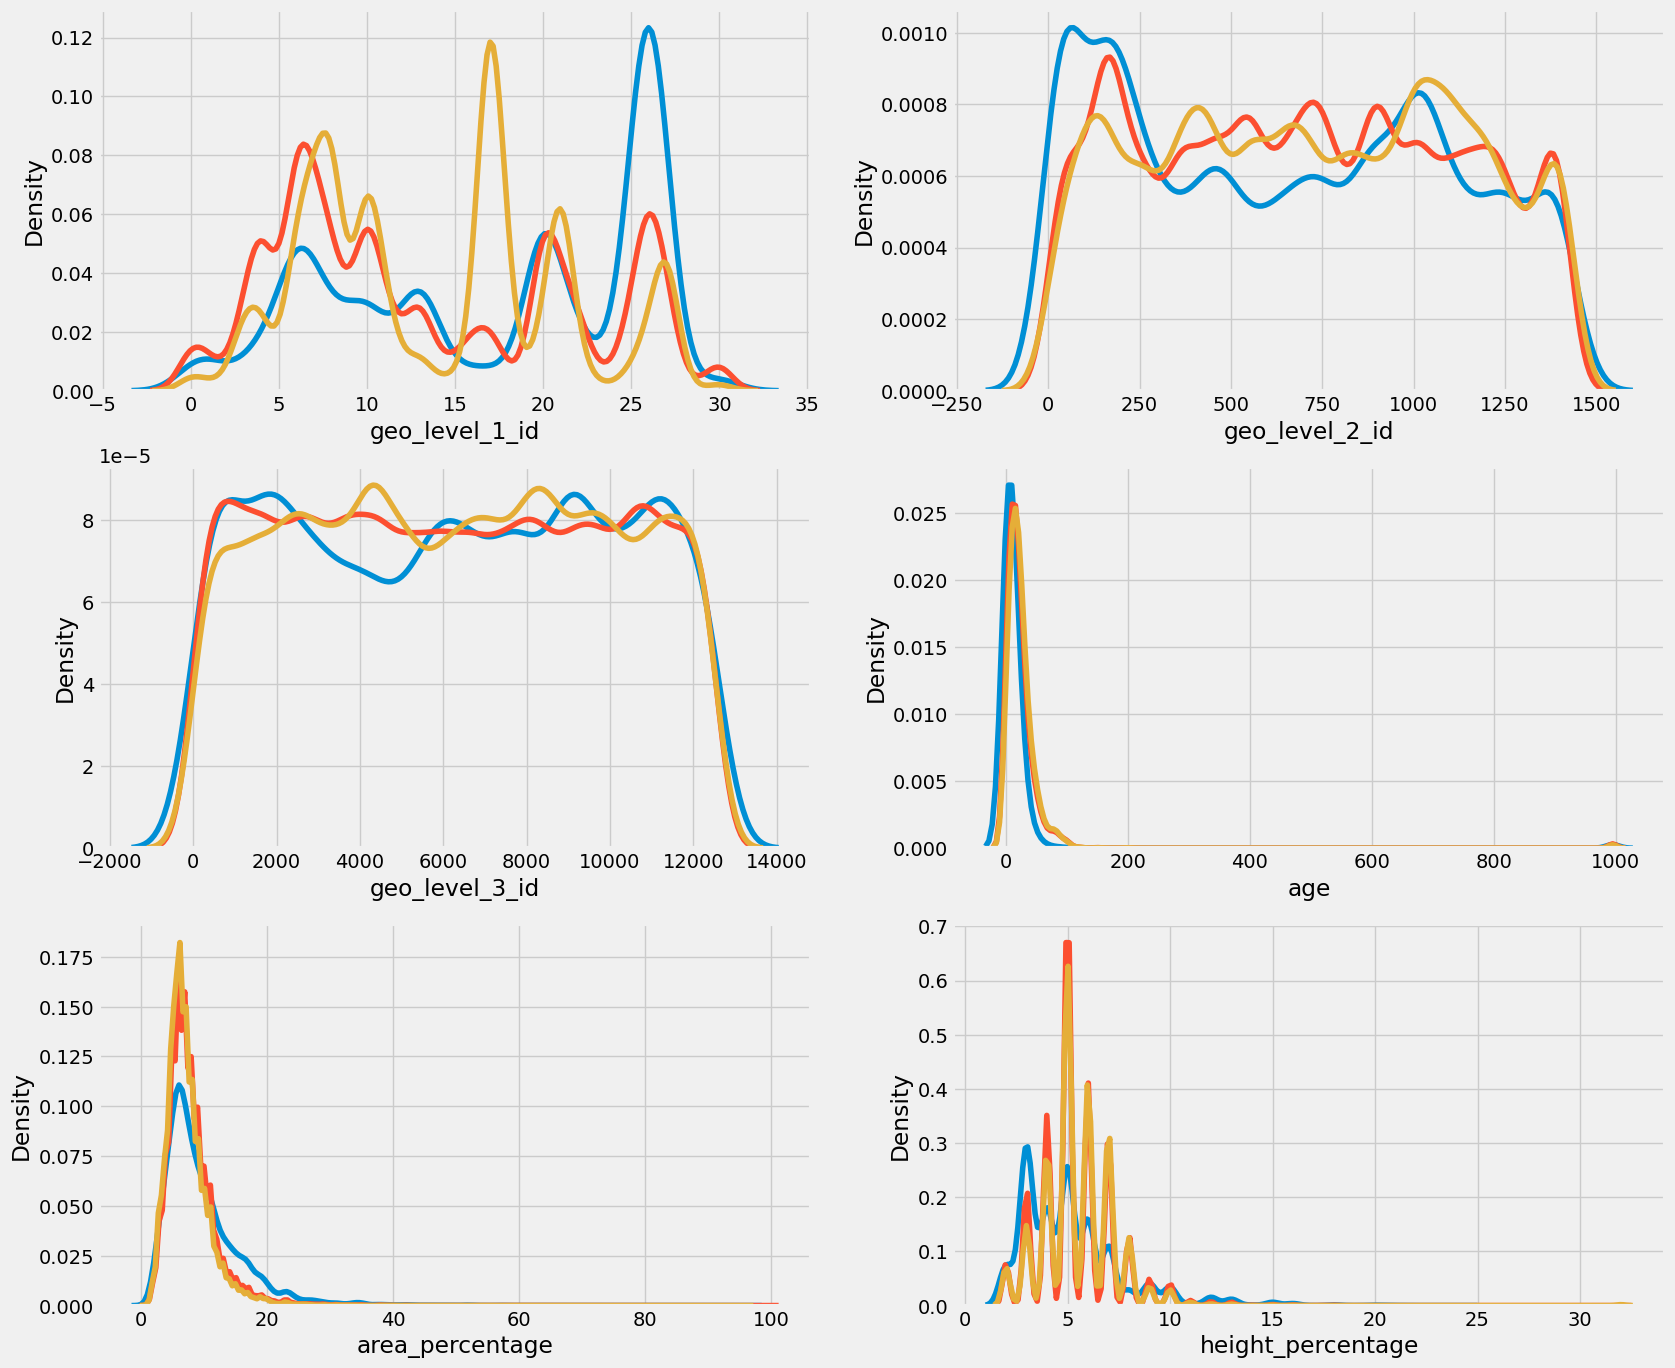

In [14]:
cont_values = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage']
def densityPlot(cont_values):
    fig = plt.figure(figsize=(18,16)) 
    plt.style.use('fivethirtyeight') 
    for i,txt in enumerate(cont_values):
        ax = fig.add_subplot(3,2,i+1)
        sns.kdeplot(train_values.loc[train_values['damage_grade'] == 1, txt], ax=ax, label='damage_grade==1') 
        sns.kdeplot(train_values.loc[train_values['damage_grade'] == 2, txt], ax=ax, label='damage_grade==2')
        sns.kdeplot(train_values.loc[train_values['damage_grade'] == 3, txt], ax=ax, label='damage_grade==3')
    plt.show()
densityPlot(cont_values)

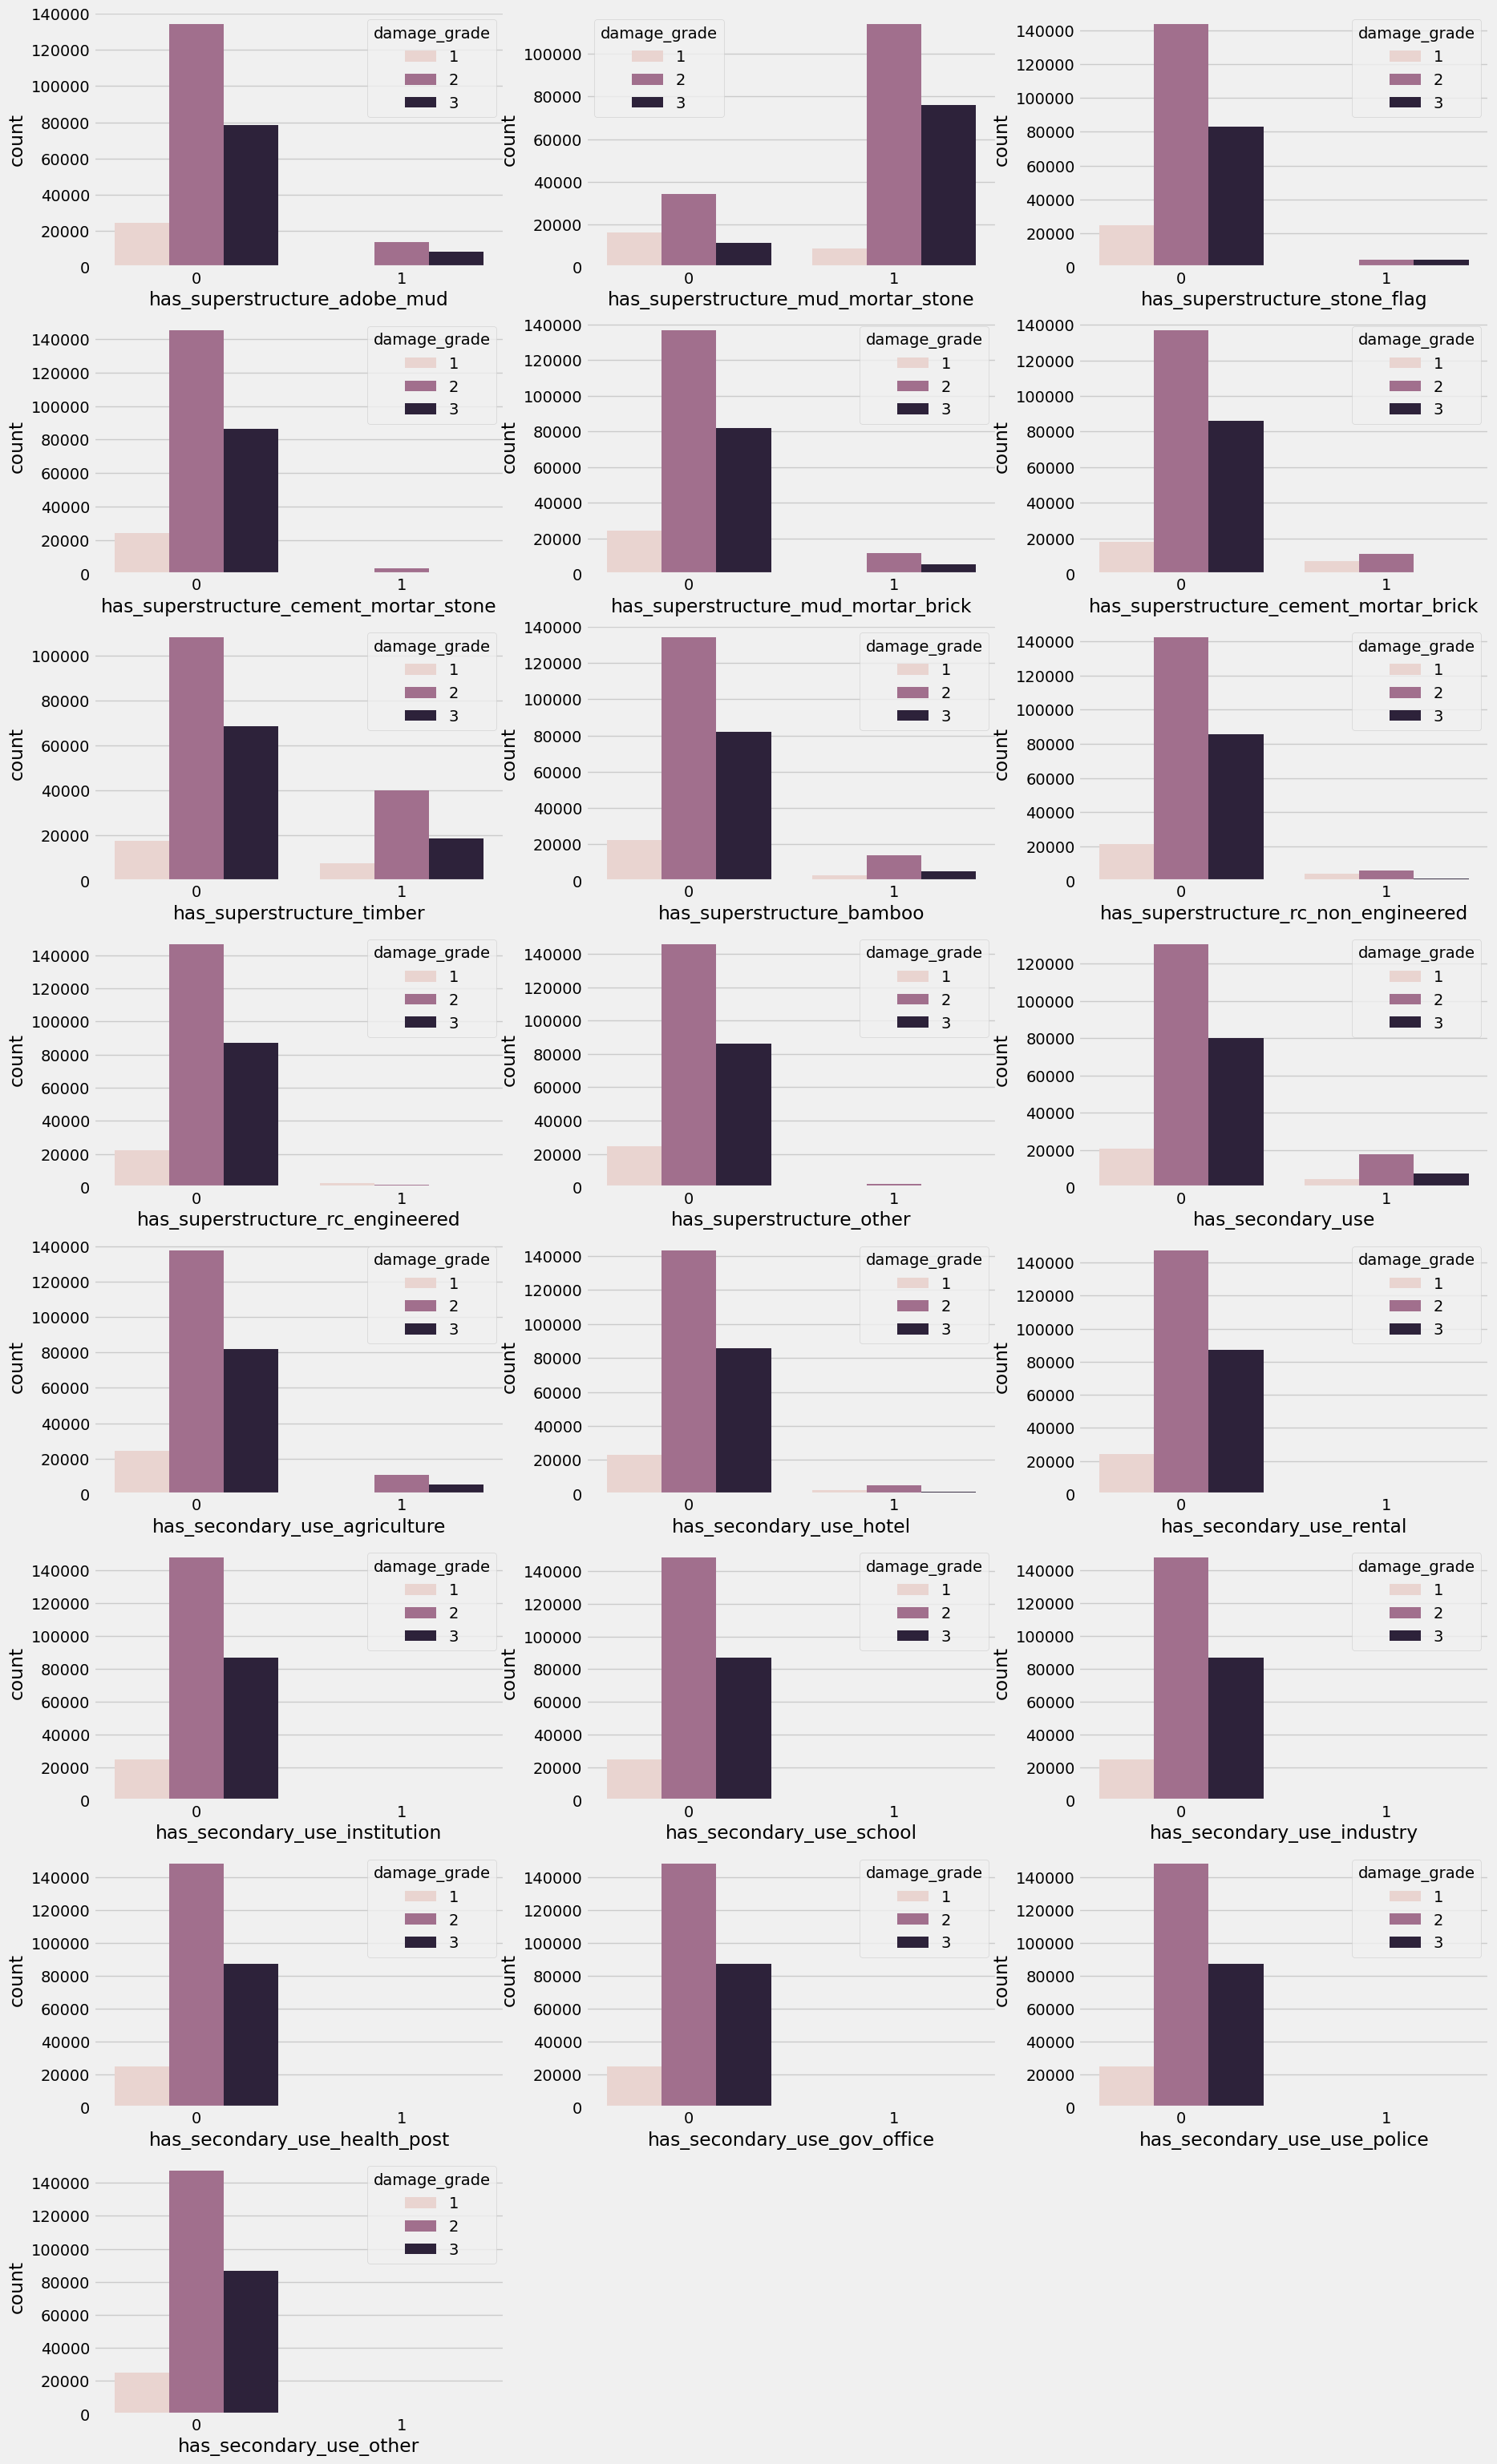

In [15]:
bin_cols = train_values.columns[train_values.columns.str.startswith('has')]
def countPlot(bin_cols):  
    plt.rcParams['font.size'] = 18
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(20,37))
    for i,txt in enumerate(bin_cols):
        ax = fig.add_subplot(8,3,i+1)
        sns.countplot(x=train_values[txt], ax=ax, hue=train_values['damage_grade'])
    plt.show()
countPlot(bin_cols)


All binary columns have more zero than 1, except has_superstructure_cement_mortor_stone
In some columns there seems having only single value like all 0's, need to check.

##### count plot on Categorical Columns

In [16]:
categorical_columns = train_values.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_columns)


Categorical columns: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']


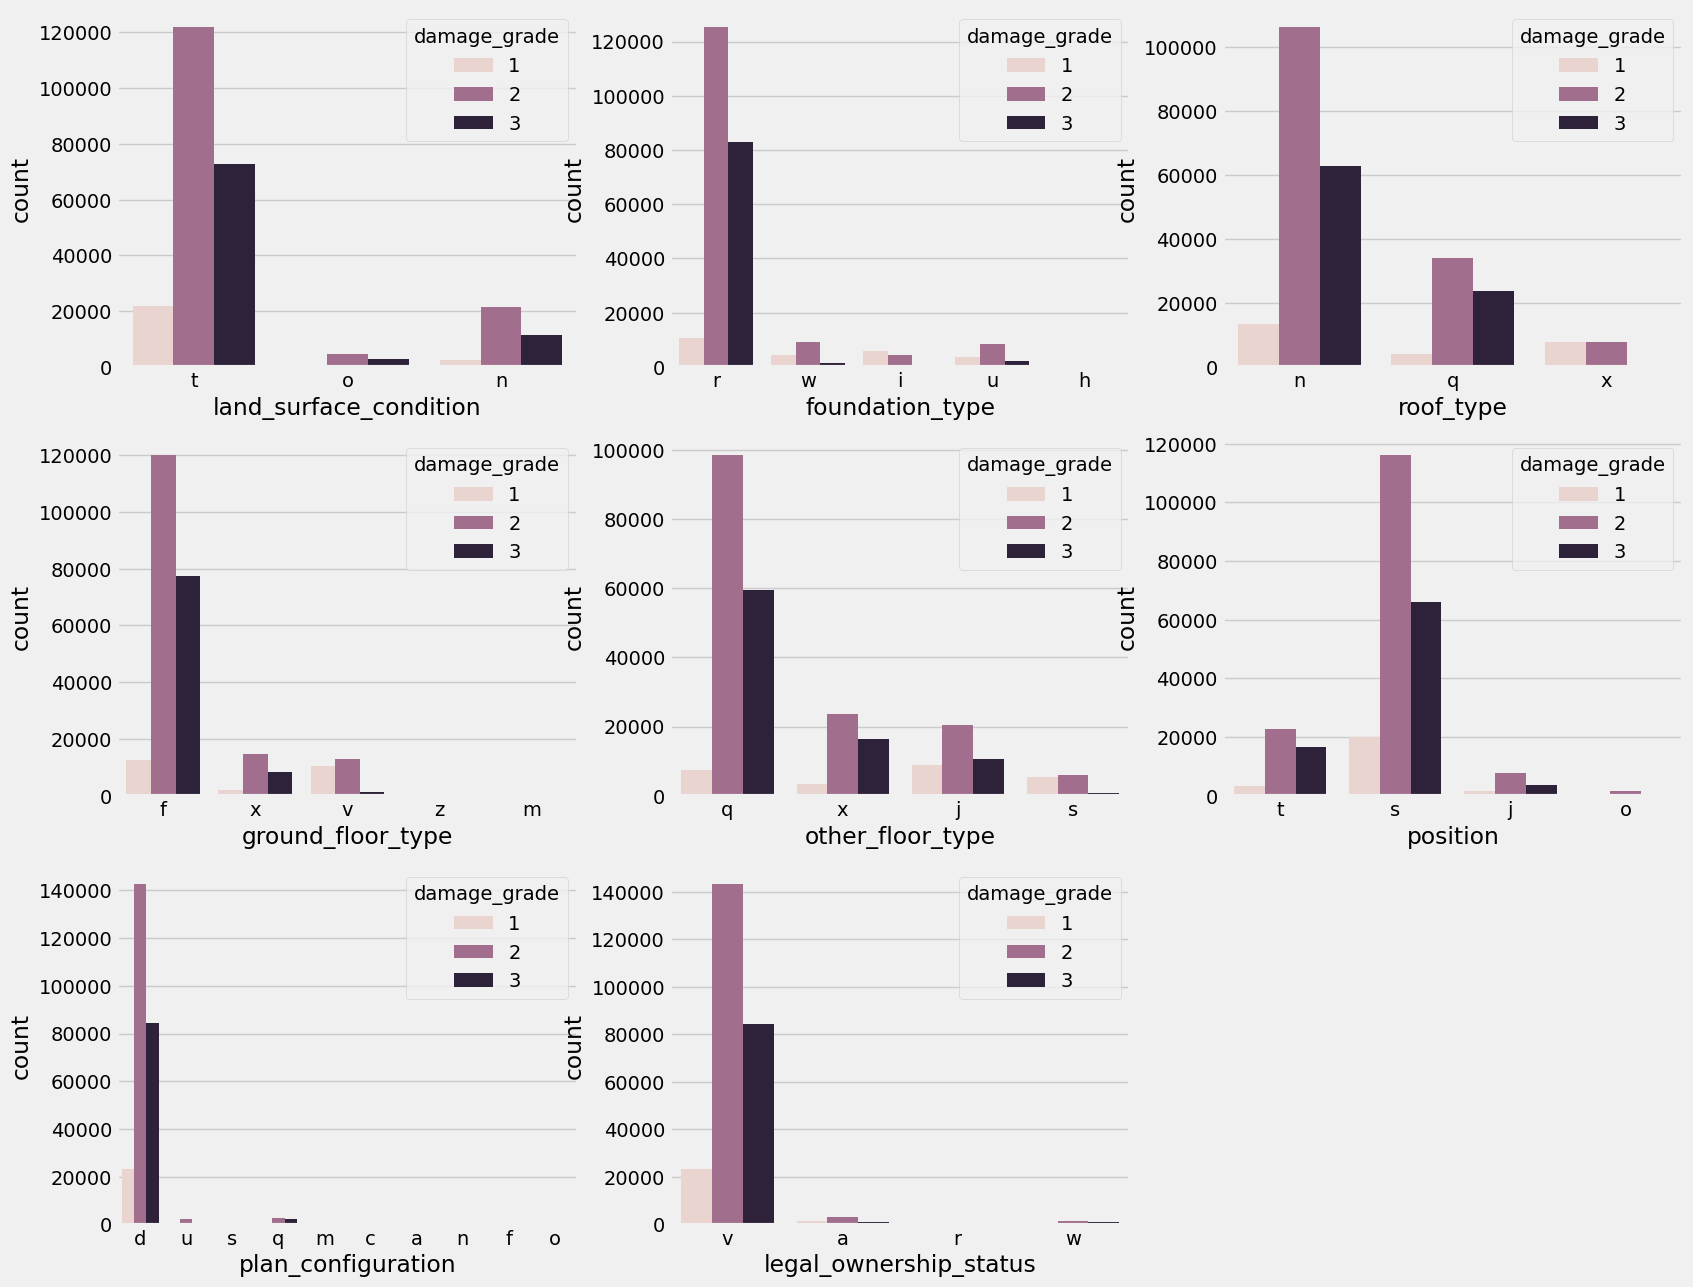

In [17]:
cat_cols = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
def catPlot(cat_cols):   
    plt.rcParams['font.size'] = 18
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(18,15))
    for i,txt in enumerate(cat_cols): 
        ax = fig.add_subplot(3,3,i+1)
        sns.countplot(x=train_values[txt], ax=ax, hue = train_values['damage_grade'])
    plt.show()
catPlot(cat_cols)

## Feature engineering

In [19]:
df_full = pd.concat([train_values], axis=0).reset_index(drop=True)
df_full.shape

(260601, 40)

In [20]:
def merge_by_concat(df1, df2, merge_on):
    merged_gf = df1[merged_on]
    merged_gf = merged_gf.merge(df2, on=merge_on, how='left')
    new_columns = [col for col in list(merged_gf) if col not in merge_on]
    df1 = pd.concat([df1, merged_gf[mew_columns]], axis=1)
    return df1
    

In [24]:
geo_age_mean = df_full.groupby(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])['age'].agg(['mean']).reset_index().rename(columns={'mean': 'geo_grp_age_mean'})
geo_height_mean = df_full.groupby(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean': 'geo_grp_height_mean'})
geo_area_mean = df_full.groupby(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'geo_grp_area_mean'})


In [26]:
type_age_mean = df_full.groupby(['foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type'])['age'].agg(['mean']).reset_index().rename(columns={'mean':'type_grp_age_mean'})
type_height_mean = df_full.groupby(['foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean': 'type_height_mean'})
type_area_mean = df_full.groupby(['foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'type_area_mean'})

In [28]:
colname = []
val = []
bin_cols = df_full.columns[df_full.columns.str.contains('has')]
for bcol in bin_cols:
    colname.append(bcol)
    val.append(df_full[bcol].value_counts().sort_index().values)

result_df = pd.DataFrame(val, index=colname)


In [29]:
result_df

,0,1
has_superstructure_adobe_mud,237500,23101
has_superstructure_mud_mortar_stone,62040,198561
has_superstructure_stone_flag,251654,8947
has_superstructure_cement_mortar_stone,255849,4752
has_superstructure_mud_mortar_brick,242840,17761
has_superstructure_cement_mortar_brick,240986,19615
has_superstructure_timber,194151,66450
has_superstructure_bamboo,238447,22154
has_superstructure_rc_non_engineered,249502,11099
has_superstructure_rc_engineered,256468,4133


In [31]:
def frequency_encode(cols, df, self_encoding=False):
    for c in cols:
        fq_dict = df[c].value_counts().to_dict()
        if self_encoding:
            df[c] = df[c].map(fq_dict)
        else:
            df[c + 'fq_enc'] = df[c].map(fq_dict)
    return df

freq_cols = ['land_surface_condition', 'foundation_type', 'roof_type',
             'ground_floor_type', 'other_floor_type', 'position', 
             'plan_configuration', 'legal_ownership_status']

df_full_freq = frequency_encode(freq_cols, df_full, self_encoding=True)


In [32]:
train_new = df_full_freq[:train_values.shape[0]]
test_new = df_full_freq[train_values.shape[0]:]

In [37]:
corr_matrix = train_new.drop(columns=['building_id', 'damage_grade'], axis=1).corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
print('Number of columns having collinearity with other columns other than target:', len(to_drop))


Number of columns having collinearity with other columns other than target: 0


### Task 2: Model Development

- Perform Hypothesis tesing to validate model assumptions and select important features
- Develop a machine learning model to predict the level of damage.
- Train the model.
- Optimize the model for better accuracy.
- Evaluate the model's performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv('train_values.csv')

In [3]:
labels = pd.read_csv('train_labels.csv')

In [4]:
features.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels.head(10)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


In [6]:
labels.describe()

,building_id,damage_grade
count,2.606010e+05,260601.000000
mean,5.256755e+05,2.238272
std,3.045450e+05,0.611814
min,4.000000e+00,1.000000
25%,2.611900e+05,2.000000
50%,5.257570e+05,2.000000
75%,7.897620e+05,3.000000
max,1.052934e+06,3.000000


In [7]:
features.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
features.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [9]:
features.shape

(260601, 39)

In [10]:
labels.shape

(260601, 2)

In [7]:
train = pd.merge(features, labels)

In [9]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

HYPOTHESIS TESTING

Z-TEST

In [10]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [8]:
#hypothesis_testing on land_surface_condition (z_test)
train.land_surface_condition.unique(),train.damage_grade.unique()

(array(['t', 'o', 'n'], dtype=object), array([3, 2, 1], dtype=int64))

The Hypothesis Testing is conducted for two assumption
1. land-surface condition "t" had a higher damage rate than land-surface condition "o"  

  *    Null Hypothesis: The land-surface condition didn’t have an effect on the damage rate.

  *   Alternative Hypothesis: The land-surface condition  affected the damage rate

2. land-surface condition "o" had a higher damage rate than land-surface condition "n"

  *    Null Hypothesis: The land-surface condition didn’t have an effect on the damage rate.

  *   Alternative Hypothesis: The land-surface condition  affected the damage rate



In [11]:
import warnings

warnings.filterwarnings(action='ignore')

In [9]:
t_Sample = np.array([np.mean(train[train["land_surface_condition"]=='t'].sample(50)["damage_grade"].values) for i in range(100)])
o_Sample = np.array([np.mean(train[train["land_surface_condition"]=='o'].sample(50)["damage_grade"].values) for i in range(100)])
n_Sample = np.array([np.mean(train[train["land_surface_condition"]=='n'].sample(50)["damage_grade"].values) for i in range(100)])

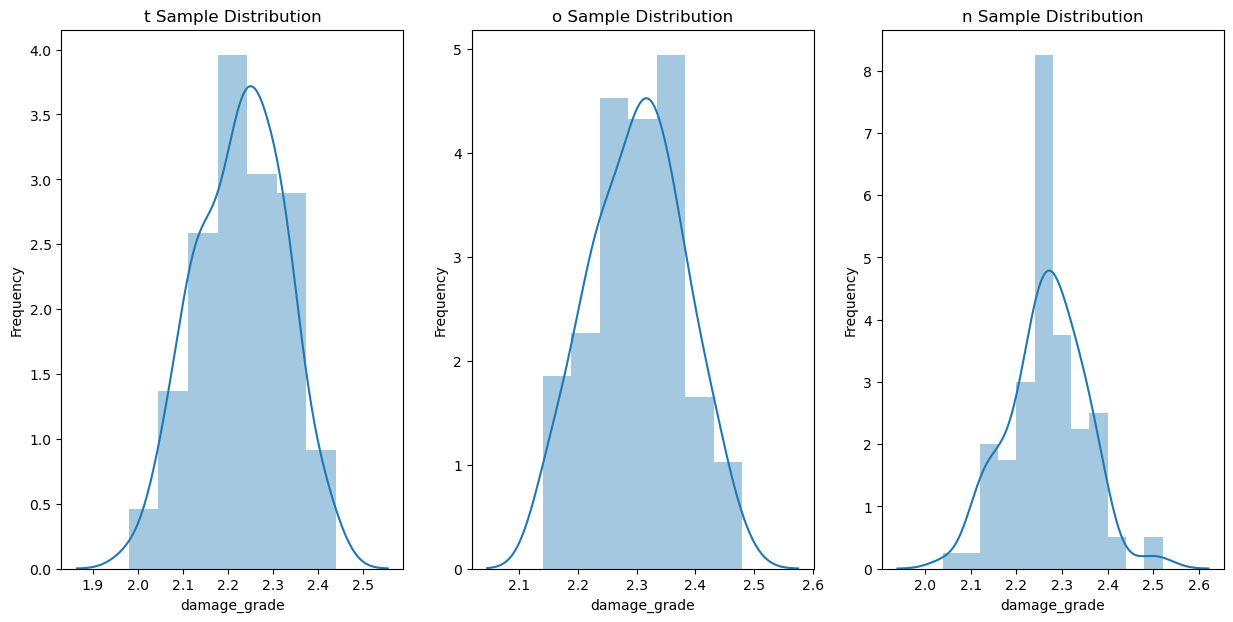

In [12]:
plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(1,3, 1)
sns.distplot(t_Sample)
plt.title("t Sample Distribution")
plt.xlabel("damage_grade")
plt.ylabel("Frequency")
plt.subplot(1, 3, 2)
sns.distplot(o_Sample)
plt.title("o Sample Distribution")
plt.xlabel("damage_grade")
plt.ylabel("Frequency")
plt.subplot(1, 3, 3)
sns.distplot(n_Sample)
plt.title("n Sample Distribution")
plt.xlabel("damage_grade")
plt.ylabel("Frequency")
plt.show()

**land-surface condition "t" had a higher damage rate than land-surface condition "o"**



In [18]:
effect = np.mean(t_Sample) - np.mean(o_Sample)
sigma_t = np.std(t_Sample)
sigma_o = np.std(o_Sample)
sigma_difference = np.sqrt((sigma_t**2)/len(t_Sample)  +  (sigma_o**2)/len(o_Sample))
z_score_1 = effect / sigma_difference
z_score_1

-4.462915449922417

In [19]:
from scipy import stats as st
print("P-value",st.norm.sf(abs(z_score_1)))

P-value 4.0425981140595614e-06


The P-value is smaller than the significance level of 0.05 . That Null hypothesis is rejected

**land-surface condition "o" had a higher damage rate than land-surface condition "n"**

In [20]:
effect = np.mean(o_Sample) - np.mean(n_Sample)
sigma_o = np.std(o_Sample)
sigma_n = np.std(n_Sample)
sigma_difference = np.sqrt((sigma_o**2)/len(o_Sample)  +  (sigma_n**2)/len(n_Sample))
z_score_2 = effect / sigma_difference
z_score_2

2.5783607943066675

In [21]:
print("P-value",st.norm.sf(abs(z_score_2)))

P-value 0.004963514418028682


The P-value is lesser than the significance level of 0.05 . That Null hypothesis is rejected

**'From the above tests we can conclude that the land-surface-conditions does have an effect on the damage rate of the earth quake'**

## chi-square test

In [13]:
numerical_cols = [col for col in train.columns if train[col].dtype != 'object']
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
chi_train=train[:]
chi_train['land_surface_condition'] = le.fit_transform(train.land_surface_condition)
chi_train['foundation_type'] = le.fit_transform(train.foundation_type)
chi_train['roof_type'] = le.fit_transform(train.roof_type)
chi_train['ground_floor_type'] = le.fit_transform(train.ground_floor_type)
chi_train['position'] = le.fit_transform(train.position)
chi_train['plan_configuration'] = le.fit_transform(train.plan_configuration)
chi_train['other_floor_type'] = le.fit_transform(train.other_floor_type)
chi_train['legal_ownership_status'] = le.fit_transform(train.legal_ownership_status)

In [15]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(chi_train)

In [16]:
print('degres of freedom = %d' % dof)
print('\n \n')
print(expected)
prob = 0.90
critical = chi2.ppf(prob, dof)
print('probability=%.6f, critical=%.6f, stat=%.6f' % (prob, critical, stat))
print('\n \n')
if abs(stat) >= critical:
    print('Dependent (reject Null Hypothesis)')

else:
    print('Independent (fail to reject Null Hypothesis)')

alpha = 1.0 - prob
print('significance=%.6f, p=%.6f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject Null Hypothesis)')
    print('\n \n')
else:
    print('Independent (fail to reject Null Hypothesis)')
    print('\n \n')

degres of freedom = 10163400

 

[[8.04890911e+05 2.12836027e+01 1.07345437e+03 ... 1.35136000e-04
  7.83788799e-03 3.42714297e+00]
 [3.21637431e+04 8.50500757e-01 4.28956396e+01 ... 5.40008531e-06
  3.13204948e-04 1.36949920e-01]
 [1.02967594e+05 2.72275577e+00 1.37324217e+02 ... 1.72875959e-05
  1.00268056e-03 4.38425459e-01]
 ...
 [6.02767729e+05 1.59388915e+01 8.03889871e+02 ... 1.01200819e-04
  5.86964753e-03 2.56652318e+00]
 [1.51350374e+05 4.00213394e+00 2.01850608e+02 ... 2.54107530e-05
  1.47382367e-03 6.44434374e-01]
 [7.46775328e+05 1.97468616e+01 9.95947681e+02 ... 1.25378768e-04
  7.27196853e-03 3.17969277e+00]]
probability=0.900000, critical=10169178.335683, stat=4262839495.385924

 

Dependent (reject Null Hypothesis)
significance=0.100000, p=0.000000
Dependent (reject Null Hypothesis)

 



## ML Models (Classification)

In [18]:
train.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [17]:
categorical = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
               'plan_configuration', 'legal_ownership_status']

In [18]:
train = pd.get_dummies(data = train, columns = categorical, drop_first = True)

In [19]:
train.drop(columns = ['building_id'], axis = 1, inplace = True)

In [20]:
train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
import statsmodels.api as sm
x_feature = np.append(arr = np.ones((train.shape[0],1)).astype(int), values = train.iloc[:,:-1], axis = 1)

In [22]:
x_feature_opt = x_feature[:,:]
regressor_OLS = sm.OLS(endog = train.iloc[:,-1], exog = x_feature_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     legal_ownership_status_w   R-squared:                       0.345
Model:                                  OLS   Adj. R-squared:                  0.345
Method:                       Least Squares   F-statistic:                     2291.
Date:                      Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                              08:59:12   Log-Likelihood:             2.8332e+05
No. Observations:                    260601   AIC:                        -5.665e+05
Df Residuals:                        260540   BIC:                        -5.659e+05
Df Model:                                60                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3681      0.006     63.790      0.000       0.357       0.379
x1         -9.716e-05   2.09e-05     -4.645      0.000      -0.000   -5.62e-05
x2           2.55e-06   3.93e-07      6.494      0.000    1.78e-06    3.32e-06
x3          -6.78e-07   4.39e-08    -15.437      0.000   -7.64e-07   -5.92e-07
x4             0.0016      0.000      3.797      0.000       0.001       0.002
x5          4.008e-06    2.2e-06      1.824      0.068   -2.98e-07    8.31e-06
x6             0.0003   4.08e-05      6.853      0.000       0.000       0.000
x7            -0.0002      0.000     -1.668      0.095      -0.001    4.05e-05
x8             0.0131      0.001     19.993      0.000       0.012       0.014
x9             0.0121      0.001     19.045      0.000       0.011       0.013
x10            0.0044      0.001      4.791      0.000       0.003       0.006
x11           -0.0009      0.001     -0.703      0.482      -0.003       0.002
x12            0.0043      0.001      5.437      0.000       0.003       0.006
x13           -0.0083      0.001     -9.821      0.000      -0.010      -0.007
x14           -0.0062      0.000    -14.392      0.000      -0.007      -0.005
x15            0.0018      0.001      2.680      0.007       0.000       0.003
x16            0.0018      0.001      1.723      0.085      -0.000       0.004
x17            0.0009      0.002      0.520      0.603      -0.002       0.004
x18           -0.0064      0.001     -4.803      0.000      -0.009      -0.004
x19            0.0009      0.000      2.300      0.021       0.000       0.002
x20           -0.0343      0.005     -7.506      0.000      -0.043      -0.025
x21            0.0358      0.005      7.882      0.000       0.027       0.045
x22            0.0302      0.005      6.494      0.000       0.021       0.039
x23            0.0351      0.005      7.147      0.000       0.025       0.045
x24            0.0368      0.007      5.315      0.000       0.023       0.050
x25            0.0713      0.010      7.442      0.000       0.053       0.090
x26            0.0269      0.007      4.030      0.000       0.014       0.040
x27            0.0192      0.013      1.529      0.126      -0.005       0.044
x28            0.0240      0.014      1.713      0.087      -0.003       0.051
x29            0.0341      0.018      1.934      0.053      -0.000       0.069
x30            0.0349      0.004      9.948      0.000       0.028       0.042
x31            0.0038      0.000     12.995      0.000       0.003       0.004
x32           -0.0050      0.001     -4.991      0.000      -0.007      -0.003
x33            0.0030      0.000      6.423      0.000       0.002       0.004
x34           -0.0351      0.003    -13.282      0.000      -0.040      -0.030
x35           -

In [23]:
import statsmodels.api as sm
target = train['damage_grade'].map({3:1, 2:1, 1:0})
X = sm.add_constant(train)
X = train.iloc[:, :7]

reg_logit = sm.Logit(target,X)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.299850
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           damage_grade   No. Observations:               260601
Model:                          Logit   Df Residuals:                   260594
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 May 2024   Pseudo R-squ.:                 0.05445
Time:                        07:10:44   Log-Likelihood:                -78141.
converged:                       True   LL-Null:                       -82641.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
geo_level_1_id         -0.0214      0.001    -28.920      0.000      -0.023      -0.020
geo_level_2_id          0.0006   1.52e-05     36.418      0.000       0.001       0.001
geo_level_3_id       4.643e-05   1.69e-06     27.426      0.000    4.31e-05    4.97e-05
count_floors_pre_eq     1.3879      0.015     89.970      0.000       1.358       1.418
age                     0.0092      0.000     20.895      0.000       0.008       0.010
area_percentage        -0.0424      0.001    -34.024      0.000      -0.045      -0.040
height_percentage      -0.1327      0.005    -25.340      0.000      -0.143      -0.122
=======================================================================================
"""

In [24]:
def back_feature_elem (data_frame, dep_var, col_list):

    while len(col_list)>0 :

        model = sm.Logit(dep_var, data_frame[col_list])
        result = model.fit(disp=0)

        largest_pvalue = round(result.pvalues,3).nlargest(1)
        print(largest_pvalue)

        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

result = back_feature_elem(X, target, X.columns)

geo_level_1_id    0.0
dtype: float64


In [12]:
x_feature.shape

(260601, 61)

In [13]:
cols = train.columns
label = ['damage_grade']
inp = list(set(cols).difference(set(label)))

In [14]:
train['damage_grade'] = train['damage_grade'].apply(lambda x: x - 1)

In [15]:
train['damage_grade'].unique()

array([2, 1, 0])

In [16]:
inp

['ground_floor_type_z',
 'land_surface_condition_t',
 'roof_type_x',
 'geo_level_1_id',
 'roof_type_q',
 'ground_floor_type_x',
 'has_secondary_use_rental',
 'position_o',
 'plan_configuration_u',
 'has_secondary_use_hotel',
 'legal_ownership_status_v',
 'height_percentage',
 'has_superstructure_mud_mortar_brick',
 'foundation_type_u',
 'position_s',
 'ground_floor_type_m',
 'other_floor_type_x',
 'age',
 'has_superstructure_mud_mortar_stone',
 'land_surface_condition_o',
 'plan_configuration_q',
 'has_superstructure_bamboo',
 'has_secondary_use_gov_office',
 'foundation_type_r',
 'other_floor_type_q',
 'count_families',
 'legal_ownership_status_w',
 'plan_configuration_s',
 'has_secondary_use_institution',
 'ground_floor_type_v',
 'plan_configuration_c',
 'plan_configuration_o',
 'legal_ownership_status_r',
 'has_secondary_use_other',
 'has_secondary_use_health_post',
 'has_superstructure_rc_engineered',
 'has_superstructure_adobe_mud',
 'has_superstructure_rc_non_engineered',
 'geo_l

In [17]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings(action='ignore')

In [18]:
# split the data using the traintestsplit function
X_train, X_test, y_train, y_test = train_test_split(train[inp], train[label], test_size = 0.25, random_state=42)

In [ ]:
# instantiate the models
models = [
    (LogisticRegression(max_iter=1000, random_state = 42)),
    (DecisionTreeClassifier(random_state = 42)),
    (RandomForestClassifier(random_state = 42))
]

In [ ]:
# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model} Classification Report:\n{classification_report(y_test, y_pred)}\n")

LogisticRegression(max_iter=1000, random_state=42) Accuracy: 0.5680
LogisticRegression(max_iter=1000, random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.14      0.21      6347
           1       0.57      0.97      0.72     36994
           2       0.52      0.00      0.01     21810

    accuracy                           0.57     65151
   macro avg       0.52      0.37      0.31     65151
weighted avg       0.54      0.57      0.43     65151


DecisionTreeClassifier(random_state=42) Accuracy: 0.6581
DecisionTreeClassifier(random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      6347
           1       0.71      0.71      0.71     36994
           2       0.62      0.62      0.62     21810

    accuracy                           0.66     65151
   macro avg       0.61      0.61      0.61     65151
weighted avg       0.66      0

The model with the best accuracy is the Random Forest with about 0.71 but we can apply hyperparameter tuning on each to see if there will be an improvement in the accuracy.

In [49]:
# Let us define the parameter grids for each algorithm

# For logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# For decision tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 10, 20]
}

# For random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2']
}

In [50]:
# Tuning the models
models_2 = [
    ("Logistic Regression", LogisticRegression(random_state=42), param_grid_lr),
    ("Decision Tree", DecisionTreeClassifier(random_state=42), param_grid_dt),
    ("Random Forest", RandomForestClassifier(random_state=42), param_grid_rf)
]

In [51]:
# We will iterate over our models to get the best
for name, model, param_grid in models_2:
    print(f"Tuning hyperparameters for {name}...")

     # Perform randomized search
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Print best parameters and score
    print(f"Best parameters for {name}:", random_search.best_params_)
    print(f"Best score for {name}:", random_search.best_score_)

    # Find and use the best estimator
    best_model = random_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set for {name}: {accuracy:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.001}
Best score for Logistic Regression: 0.5694244052187261
Accuracy on test set for Logistic Regression: 0.5672

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'min_samples_split': 20, 'max_depth': 20}
Best score for Decision Tree: 0.6946226656433871
Accuracy on test set for Decision Tree: 0.7013

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'max_features': 'sqrt'}
Best score for Random Forest: 0.71207981580967
Accuracy on test set for Random Forest: 0.7158



The best performing model is the Random Forest which is still the same accuracy score before hyperparameter tuning. We can explore the XGBoost to see if there will be any improvement.

In [52]:
# import library
import xgboost as xgb

In [53]:
# Defining the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [56]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

In [58]:
# Tuning the hyperparameters
print("Tuning hyperparameters for XGBoost...")

# Perform randomized search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search_xgb.fit(X_train, y_train)

# Printing best parameters and score
print(f"Best parameters for XGBoost: {random_search_xgb.best_params_}")
print(f"Best score for XGBoost: {random_search_xgb.best_score_}")

# best estimator
best_xgb = random_search_xgb.best_estimator_

# Make predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy on test set for XGBoost: {accuracy_xgb:.4f}")

Tuning hyperparameters for XGBoost...
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best score for XGBoost: 0.7393553338449732
Accuracy on test set for XGBoost: 0.7407


The best score so far is the XGBoost with about 74% accuracy score. We can try one more algorithm which is the SVM to see if there will be any improvement.

In [21]:
from sklearn.svm import LinearSVC

In [22]:
# Initialize the SVC classifier
model_svc = LinearSVC(random_state = 42)

In [24]:
# fit the model and print report
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.19      0.51      0.28      6347
           1       0.58      0.72      0.64     36994
           2       0.48      0.05      0.10     21810

    accuracy                           0.48     65151
   macro avg       0.42      0.43      0.34     65151
weighted avg       0.51      0.48      0.42     65151



We have a low accuracy score of 0.48 using the LinearSVC. We can try one more time using the SGD classifier

In [25]:
from sklearn.linear_model import SGDClassifier

In [28]:
# Instantiate the model
model_sgd = SGDClassifier(loss='hinge', random_state= 42)

In [29]:
# fit the model and print report
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.41      0.13      0.20      6347
           1       0.57      0.95      0.71     36994
           2       0.45      0.03      0.05     21810

    accuracy                           0.56     65151
   macro avg       0.48      0.37      0.32     65151
weighted avg       0.51      0.56      0.44     65151



We have an accuracy score of 0.56 which is also low. Due to computational cost and longer training times, we cannot try the SVC with rbf or polynomial. So we will proceed to find the important features using the XGBoost model.

In [63]:
# Find the important features that mattered in the XGBoost model
feature_importance = best_xgb.get_booster().get_score(importance_type='gain')

In [60]:
# Sorting the feature importance in descending order and rounding it to two decimal places
sorted_feature_importance = sorted(
    ((feature, round(importance, 2)) for feature, importance in feature_importance.items()),
    key=lambda kv: kv[1],
    reverse=True
)

In [61]:
# Printing the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: foundation_type_r, Importance: 26.5
Feature: ground_floor_type_v, Importance: 16.14
Feature: geo_level_1_id, Importance: 11.67
Feature: has_superstructure_mud_mortar_stone, Importance: 8.04
Feature: roof_type_x, Importance: 6.64
Feature: foundation_type_i, Importance: 6.4
Feature: foundation_type_w, Importance: 5.94
Feature: has_superstructure_cement_mortar_brick, Importance: 5.25
Feature: has_superstructure_stone_flag, Importance: 3.28
Feature: geo_level_2_id, Importance: 3.28
Feature: has_superstructure_mud_mortar_brick, Importance: 3.25
Feature: other_floor_type_q, Importance: 2.82
Feature: count_floors_pre_eq, Importance: 2.4
Feature: has_superstructure_adobe_mud, Importance: 2.39
Feature: has_superstructure_rc_engineered, Importance: 2.38
Feature: roof_type_q, Importance: 2.12
Feature: has_superstructure_timber, Importance: 2.09
Feature: has_superstructure_other, Importance: 2.04
Feature: legal_ownership_status_w, Importance: 1.99
Feature: has_superstructure_cement_mortar

The ten most important features that matter when predicting the Gorkhal earthquake were:

- foundation_type_r, Importance: 26.5
- ground_floor_type_v, Importance: 16.14
- geo_level_1_id, Importance: 11.67
- has_superstructure_mud_mortar_stone, Importance: 8.04
- roof_type_x, Importance: 6.64
- foundation_type_i, Importance: 6.4
- foundation_type_w, Importance: 5.94
- has_superstructure_cement_mortar_brick, Importance: 5.25
- has_superstructure_stone_flag, Importance: 3.28
- geo_level_2_id, Importance: 3.28

In [64]:
# we can plot a graph of this

# Select the top 10 features
top_n = 10
top_features = sorted_feature_importance[:top_n]

In [65]:
# Extract feature names and importance values
features = [feature for feature, importance in top_features]
importances = [importance for feature, importance in top_features]

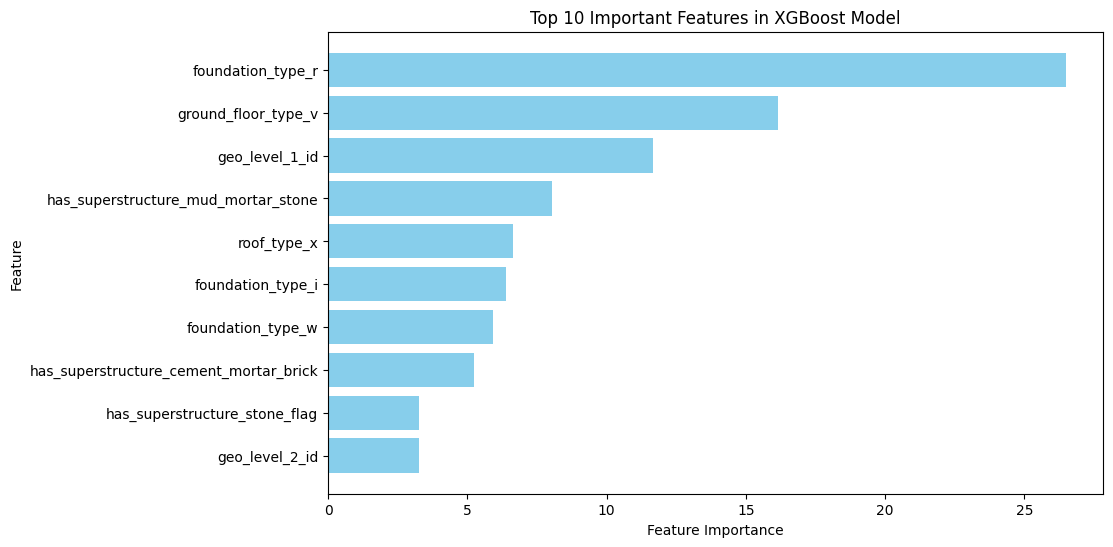

In [67]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features in XGBoost Model')
plt.gca().invert_yaxis();

### Task 3: Recommendations for Seismologists

Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings


#### 1.Foundation Type ('foundation_type_r', 'foundation_type_i', 'foundation_type_w'):
Foundation type 'r', 'i'. and 'w' have the highest risks, indicating it has an important role in building instability. Seismologists should focus on improving the resilience of buildings with these foundation types through retrofitting, reinforcement, or stricter building codes.

#### 2. Ground Floor Type ('ground_floor_type_v'):
Ground floor type 'v' also has considerable importance in building damage. It should be avoided in building structures. Strengthening ground floors, especially those with this type, can improve the overall stability of buildings during earthquakes.

#### 3. Geographic Region Features ('geo_level_1_id', 'geo_level_2_id'):
The geographical location at level 1  and 2 which are where there are more larger buildings that are at risk to seismic forces. Seismologists should implement stricter building codes or let builders avoid construction in these regions if possible. Also Seismologists should conduct detailed risk assessments to identify buildings in those regions that are prone to seismic hazards and prioritize mitigation efforts in those areas.

#### 4. Superstructure Materials ('has_superstructure_mud_mortar_stone', 'has_superstructure_cement_mortar_brick', 'has_superstructure_stone_flag'):
Buildings with mud-mortar-stone and cement-mortar-brick superstructures are vulnerable. Seismologists should advocate for the use of more resilient materials or reinforcement techniques for such structures.

#### 5. Roof Type ('roof_type_x'):
Roof type 'x' is vulnerable to earthquake damage. Seismologists should recommend improving or redesigning roofs to increase their resistance to seismic forces.

#### 6. Collaboration and Education:
Seismologists should collaborate with local authorities, urban planners, engineers, and policymakers to develop and enforce building codes and standards that prioritize earthquake resilience.
Communities and stakeholders should be educated about earthquake risks and the importance of adopting seismic-resistant construction practices.